In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hollywood_movies = pd.read_csv('hollywood_movies.csv')

print('First look at the data.')
print(hollywood_movies.head())

print('The "exclude" column is all NaN, so it\'s dropped.')
print(hollywood_movies.loc[:, 'exclude'].value_counts())

hollywood_movies = hollywood_movies.drop('exclude', axis=1)
# hollywood_movies

First look at the data.
   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1             

The oultlier of 'Paranormal Activity' distorts these scatterplots.


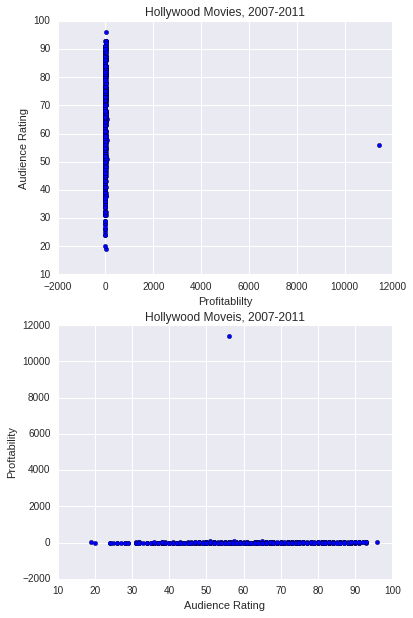

In [2]:
# the 'f' in plt.figure must be lowercase!
fig1 = plt.figure(figsize=(6,10))
ax1_fig1 = fig1.add_subplot(2, 1, 1)
ax2_fig1 = fig1.add_subplot(2, 1, 2)

ax1_fig1.scatter(hollywood_movies['Profitability'], hollywood_movies['Audience Rating'])
ax1_fig1.set_xlabel('Profitablilty')
ax1_fig1.set_ylabel('Audience Rating')
ax1_fig1.set_title('Hollywood Movies, 2007-2011')

ax2_fig1.scatter(hollywood_movies['Audience Rating'], hollywood_movies['Profitability'])
ax2_fig1.set_xlabel('Audience Rating')
ax2_fig1.set_ylabel('Proftability')
ax2_fig1.set_title('Hollywood Moveis, 2007-2011')   

print("The oultlier of 'Paranormal Activity' distorts these scatterplots.")
                   
plt.show()

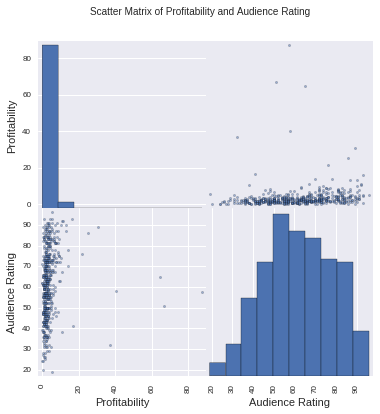

In [3]:
from pandas.tools.plotting import scatter_matrix

normal_movies = hollywood_movies[hollywood_movies.Film != 'Paranormal Activity']

prof_and_rating = normal_movies.loc[:, ['Profitability', 'Audience Rating']]
fig2 = scatter_matrix(prof_and_rating, figsize=(6, 6))

# suptitle has to be called from plt
plt.suptitle('Scatter Matrix of Profitability and Audience Rating')

plt.show()

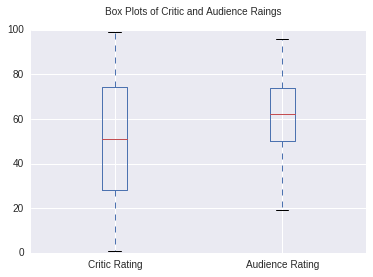

In [4]:
fig3 = normal_movies.loc[:, ['Critic Rating', 'Audience Rating']].plot(kind='box')
plt.suptitle('Box Plots of Critic and Audience Raings')

plt.show()

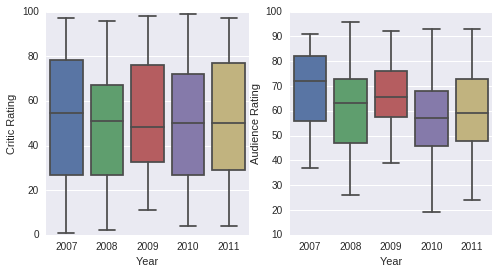

In [5]:
normal_movies = normal_movies.sort_values('Year')

fig4 = plt.figure(figsize=(8,4))
ax1_fig4 = fig4.add_subplot(1, 2, 1)
ax2_fig4 = fig4.add_subplot(1, 2, 2)

sns.boxplot(x='Year', y='Critic Rating', data=normal_movies, ax=ax1_fig4)
sns.boxplot(x='Year', y='Audience Rating', data=normal_movies, ax=ax2_fig4)

sns.plt.show()

True     447
False     69
Name: Profitable, dtype: int64


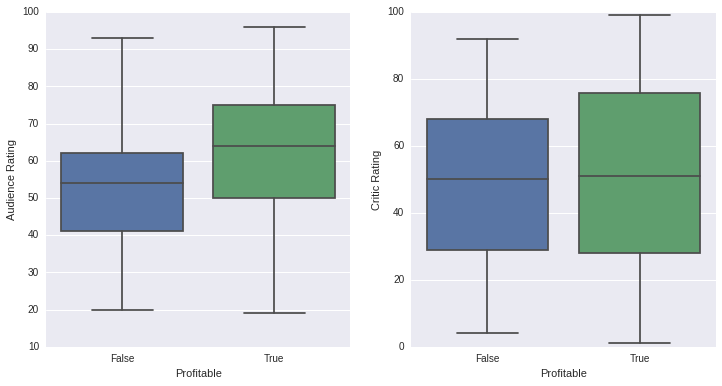

A higher Audience Rating of a film has a greater correlation to profitability than a higher Critic Rating.


In [6]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

fig5 = plt.figure(figsize=(12,6))

ax1_fig5 = fig5.add_subplot(1, 2, 1)
ax2_fig5 = fig5.add_subplot(1, 2, 2)

sns.boxplot(x='Profitable', y='Audience Rating', data=normal_movies, ax=ax1_fig5)
sns.boxplot(x='Profitable', y='Critic Rating', data=normal_movies, ax=ax2_fig5)

sns.plt.show()

print("A higher Audience Rating of a film has a greater correlation to profitability than a higher Critic Rating.")